# Lesson 1

## Efficient Coding with Python and Numpy

* Store data in NumPy arrays, not Python lists.

* Avoid large loops in favor of vectorized operations.

* Use array slicing, masks, fancy indexing, and broadcasting to eliminate loops. 

## Description of Surveys and Data Sets Used in Examples

In [3]:
from astroML.datasets import fetch_imaging_sample

In [4]:
#Importing the data
data = fetch_imaging_sample()

In [5]:
 data.shape

(330753,)

In [6]:
#Names of the first five columns
data.dtype.names[:5]

('ra', 'dec', 'run', 'rExtSFD', 'uRaw')

In [7]:
#Accessing the first five data in each column 
data['ra'][:5]

array([0.358174, 0.358382, 0.357898, 0.35791 , 0.358881])

In [8]:
data['dec'][:5]

array([-0.508718, -0.551157, -0.570892, -0.426526, -0.505625])

/Users/tharacaba/new_folder/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


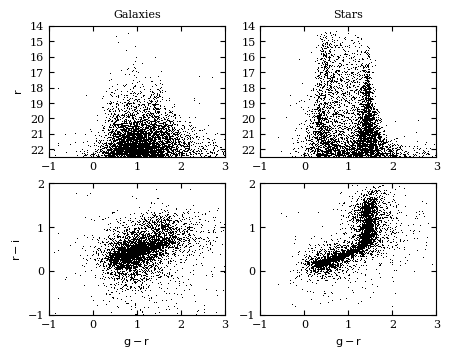

In [9]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_imaging_sample
%matplotlib inline

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def get_stars_and_galaxies(Nstars=5000, Ngals=5000):
    """Get the subset of star/galaxy data to plot"""
    data = fetch_imaging_sample()

    objtype = data['type']

    stars = data[objtype == 6][:Nstars]
    galaxies = data[objtype == 3][:Ngals]

    return stars, galaxies


def plot_stars_and_galaxies(stars, galaxies):
    """Plot the star and galaxy data"""
    # Note: we use plot() rather than scatter() because it's more efficient
    # for large numbers of points.
    # Scatter should be used only when points need to be different colors
    # and/or sizes
    plot_kwargs = dict(color='k', linestyle='none', marker=',')

    fig = plt.figure(figsize=(5, 3.75))

    ax1 = fig.add_subplot(221)
    ax1.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'],
             **plot_kwargs)

    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(galaxies['gRaw'] - galaxies['rRaw'],
             galaxies['rRaw'] - galaxies['iRaw'],
             **plot_kwargs)

    ax3 = fig.add_subplot(222, sharey=ax1)
    ax3.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'],
             **plot_kwargs)

    ax4 = fig.add_subplot(224, sharex=ax3, sharey=ax2)
    ax4.plot(stars['gRaw'] - stars['rRaw'],
             stars['rRaw'] - stars['iRaw'],
             **plot_kwargs)

    # set labels and titles
    ax1.set_ylabel(r'${\rm r}$')
    ax2.set_ylabel(r'${\rm r - i}$')
    ax2.set_xlabel(r'${\rm g - r}$')
    ax4.set_xlabel(r'${\rm g - r}$')
    ax1.set_title('Galaxies')
    ax3.set_title('Stars')

    # set axis limits
    ax2.set_xlim(-1, 3)
    ax3.set_ylim(22.5, 14)
    ax4.set_xlim(-1, 3)
    ax4.set_ylim(-1, 2)

    # adjust tick spacings on all axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.xaxis.set_major_locator(plt.MultipleLocator(1))
        ax.yaxis.set_major_locator(plt.MultipleLocator(1))

#------------------------------------------------------------
# Generate and show the plot
stars, galaxies = get_stars_and_galaxies()
plot_stars_and_galaxies(stars, galaxies)
plt.show()

#Scatter plot of the colors and magnitudes of the first 5000 galaxies and the first 5000 stars from this sample

In [10]:
from astroML.datasets import fetch_sdss_spectrum

In [11]:
plate = 1615 # plate number of the spectrum
mjd = 53166 # modified Julian date
fiber = 513 # fiber ID number on a given plate
data = fetch_sdss_spectrum(plate, mjd, fiber)

Text(0, 0.5, 'Flux')

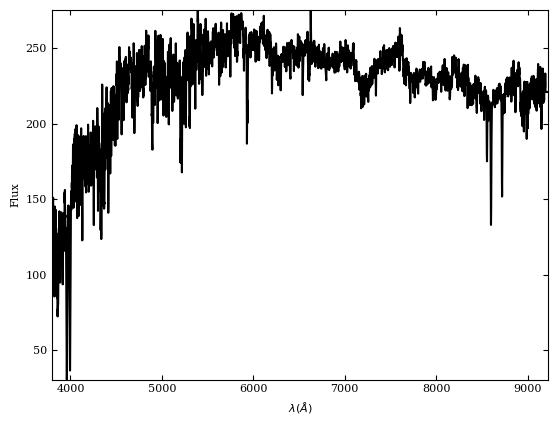

In [12]:
#An example of an SDSS spectrum
%matplotlib inline
ax = plt.axes()
ax.plot(data.wavelength(), data.spectrum ,'-k')
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')

In [13]:
#from astroML.datasets import tools

In [14]:
#target = tools.TARGET_GALAXY # main galaxy sample
#plt, mjd, fib = tools.query_plate_mjd_fiber(5, primtarget=target) 
#Code didn't work

In [15]:
from astroML.datasets import fetch_sdss_specgals

In [16]:
data = fetch_sdss_specgals()

In [17]:
data.shape

(661598,)

In [18]:
data.dtype.names[:5]

('ra', 'dec', 'mjd', 'plate', 'fiberID')

In [19]:
data = data[:10000] # truncate data

In [20]:
u = data['modelMag_u']
r = data['modelMag_r']
rPetro = data['petroMag_r']

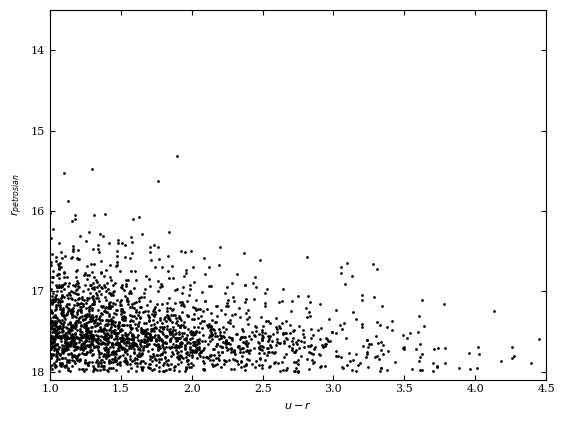

In [27]:
#We can use the data for the first 10,000 entries to create an example color–magnitude diagram
ax = plt.axes()
ax.scatter(u-r, rPetro, s=4, lw=0, c='k')
ax.set_xlim(1, 4.5)
ax.set_ylim(18.1, 13.5)
ax.set_xlabel('$u - r$')
ax.set_ylabel('$r_{petrosian}$')
plt.show()

In [22]:
from astroML.datasets import fetch_dr7_quasar

In [23]:
data = fetch_dr7_quasar()

In [24]:
data.shape

(105783,)

In [25]:
data.dtype.names[:5]

('sdssID', 'RA', 'dec', 'redshift', 'mag_u')

In [26]:
data = data[:10000]
r = data['mag_r']
i = data['mag_i']
z = data['redshift']

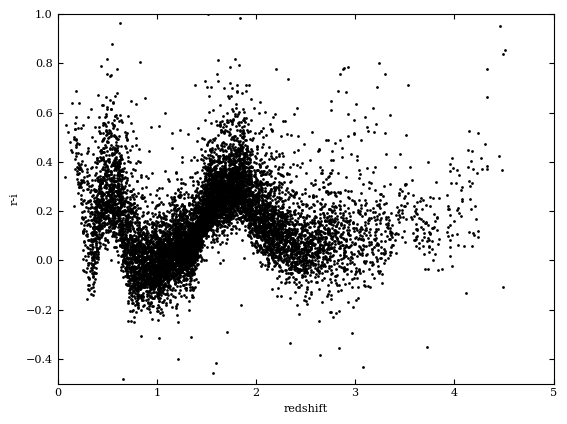

In [28]:
#One interesting feature of quasars is the redshift dependence of their photometric colors. We can visualize this for the first 10,000 points in the data set as follows:
ax = plt.axes()
ax.scatter(z, r - i, s=4, c='black',linewidth=0)
ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)
ax.set_xlabel('redshift')
ax.set_ylabel('r-i')
plt.show()

In [29]:
from astroML.datasets import fetch_sdss_sspp

In [31]:
data = fetch_sdss_sspp()

In [32]:
data.shape

(327260,)

In [33]:
data.dtype.names[:5]

('ra', 'dec', 'Ar', 'upsf', 'uErr')

In [34]:
data = data[:10000]

In [35]:
rpsf = data['rpsf'] # make some reasonable cuts 

In [36]:
data = data[(rpsf > 15) & (rpsf < 19)]

In [37]:
logg = data['logg']

In [38]:
Teff = data['Teff']

Text(0, 0.5, '$\\mathrm{log_{10}[g / (cm/s^2)]}$')

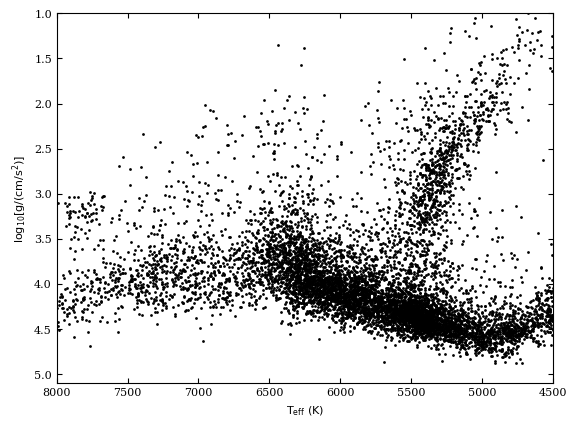

In [41]:
#The surface gravity vs. effective temperature plot for the first 10,000 entries from the catalog of stars with SDSS spectra
ax = plt.axes()
ax.scatter(Teff, logg, s=4, lw=0, c='k')
ax.set_xlim(8000, 4500)
ax.set_ylim(5.1, 1)
ax.set_xlabel(r'$\mathrm{T_{eff}\ (K)}$')
ax.set_ylabel(r'$\mathrm{log_{10}[g / (cm/s^2)]}$')

In [42]:
from astroML.datasets import fetch_sdss_S82standards

In [43]:
data = fetch_sdss_S82standards()

downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/main/datasets/stripe82calibStars_v2.6.dat.gz to /Users/tharacaba/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


In [44]:
data.shape

(1006849,)

In [45]:
data.dtype.names[:5]

('RA', 'DEC', 'RArms', 'DECrms', 'Ntot')

In [46]:
data = data[:10000]

In [47]:
g = data['mmu_g'] # g-band mean magnitude
r = data['mmu_r'] # r-band mean magnitude
i = data['mmu_i'] # i-band mean magnitude

Text(0, 0.5, 'r - i')

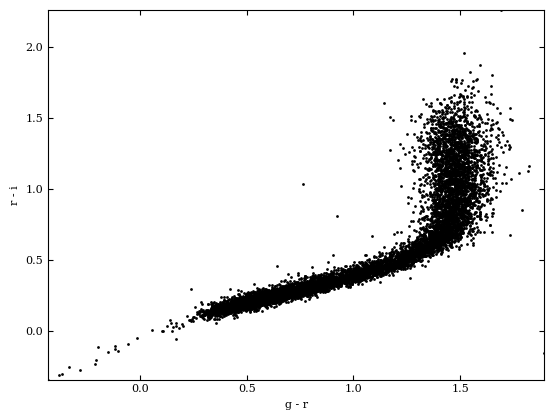

In [49]:
#The g − r vs. r − i color–color diagram for the first 10,000 entries in the Stripe 82 Standard Star Catalog.
ax = plt.axes()
ax.scatter(g - r, r - i, s=4, c='black', linewidth=0)
ax.set_xlabel('g - r')
ax.set_ylabel('r - i')

In [50]:
from astroML.datasets import fetch_LINEAR_sample

In [51]:
data = fetch_LINEAR_sample()

[=========================================]  303.4kb / 303.4kb   
[=========================================]  16.05Mb / 16.05Mb   


In [52]:
gr = data.targets['gr'] # g-r color
ri = data.targets['ri'] # r-i color
logP = data.targets['LP1'] #log_10 (period) in days
gr.shape

(7010,)

In [54]:
id = data.ids[2756] # choose one id from the sample
id

18527462

In [59]:
t, mag, dmag = data[id].T # access light curve data
logP = data.get_target_parameter(id, 'LP1')

## Plotting and Visualizing the Datain This Book

* Plotting Two-Dimensional Representations of Large Data Sets: contour plot, Hess diagram